In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import powerlaw

%run backwards_time_voter_model.ipynb

In [77]:
# Define parameters as in paper
alpha = 3e-4
L = 500

In [78]:
grids = []
species_sizes = []

for i in range(1, 21):
    species_load = pickle.load(open(f"Basic model runs/{500}x{500},alpha={alpha},kernel=nearest.p_{i}", "rb" ))
    for specie in species_load:
        species_sizes.append(len(specie))
    species_ids = np.random.uniform(size=len(species_load))
    print(len(species_load))

    grid = np.zeros((500, 500))
    for i, specie in enumerate(species_load):
        for coord in specie:
            grid[coord] = species_ids[i]
    grids.append(grid)

129
133
131
121
127
117
122
119
119
143
125
97
125
122
122
115
107
130
152
128


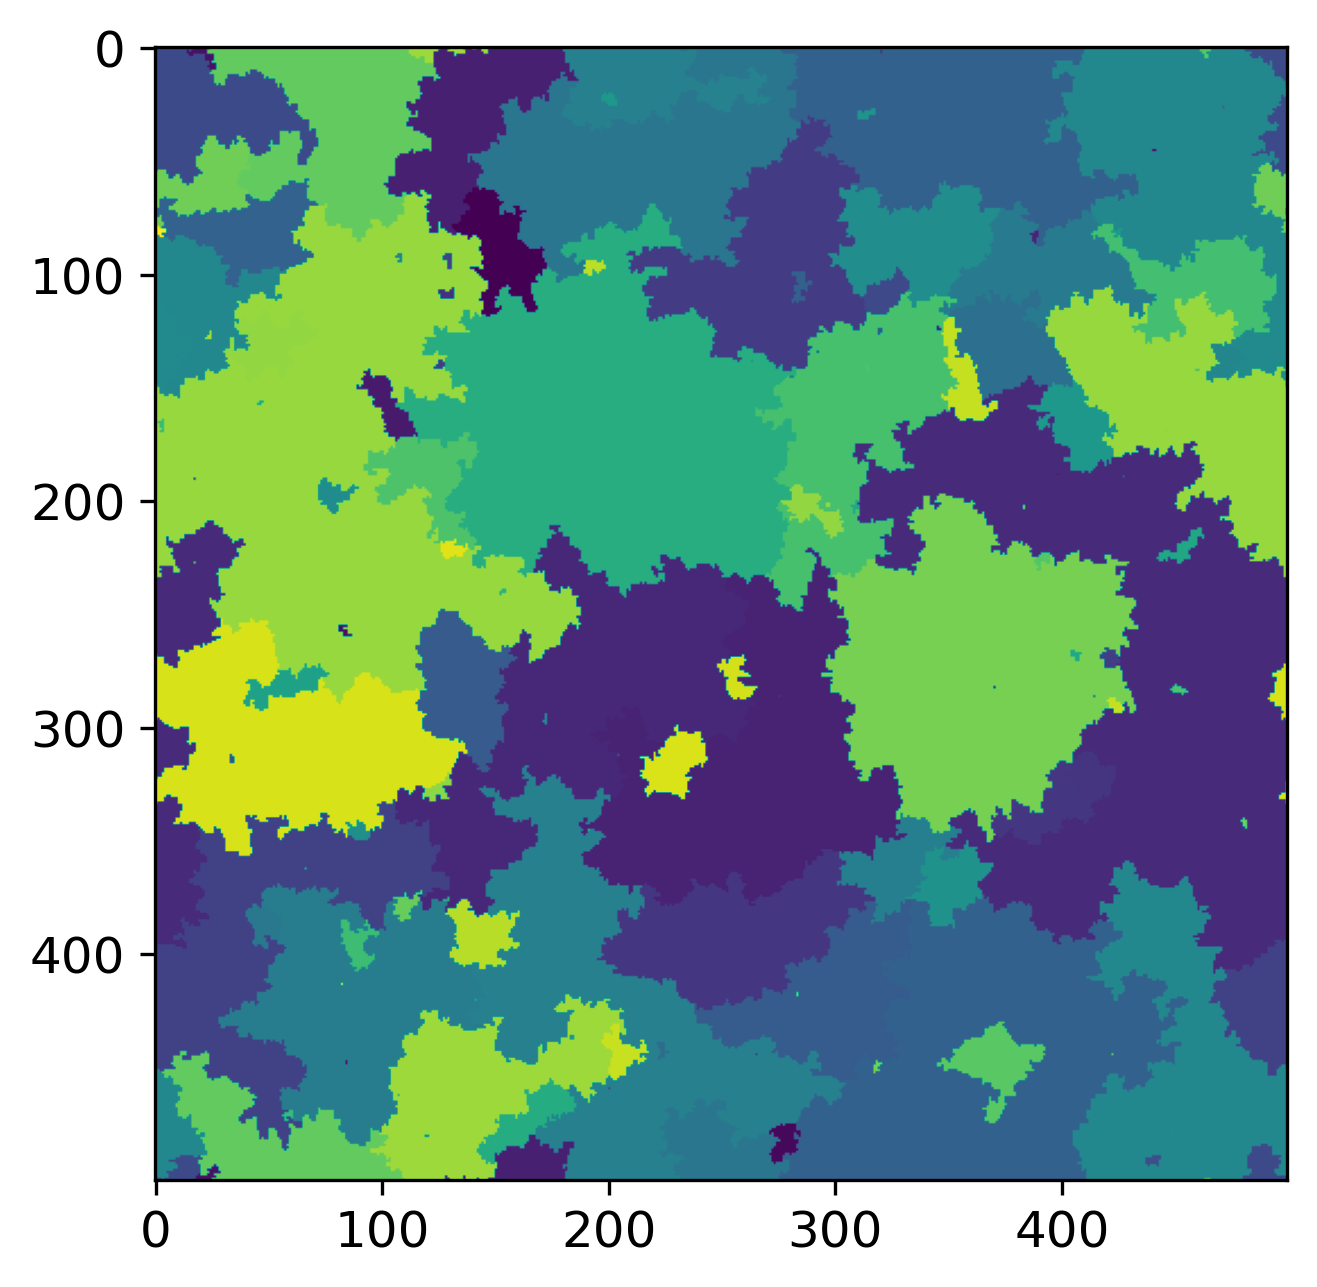

In [79]:
plt.figure(figsize=(5, 5))
plt.imshow(grid)
plt.show()

In [80]:
n_centers = 10

areas = []
num_species = []

for grid in grids:
    areas, cur_num_species = sa_curve(grid, n_centers)
    num_species = num_species + cur_num_species
    
spec_std_dev = np.std(num_species, axis=0)
spec_mean = np.mean(num_species, axis=0)

0.8325657075934888 0.013241236562901234


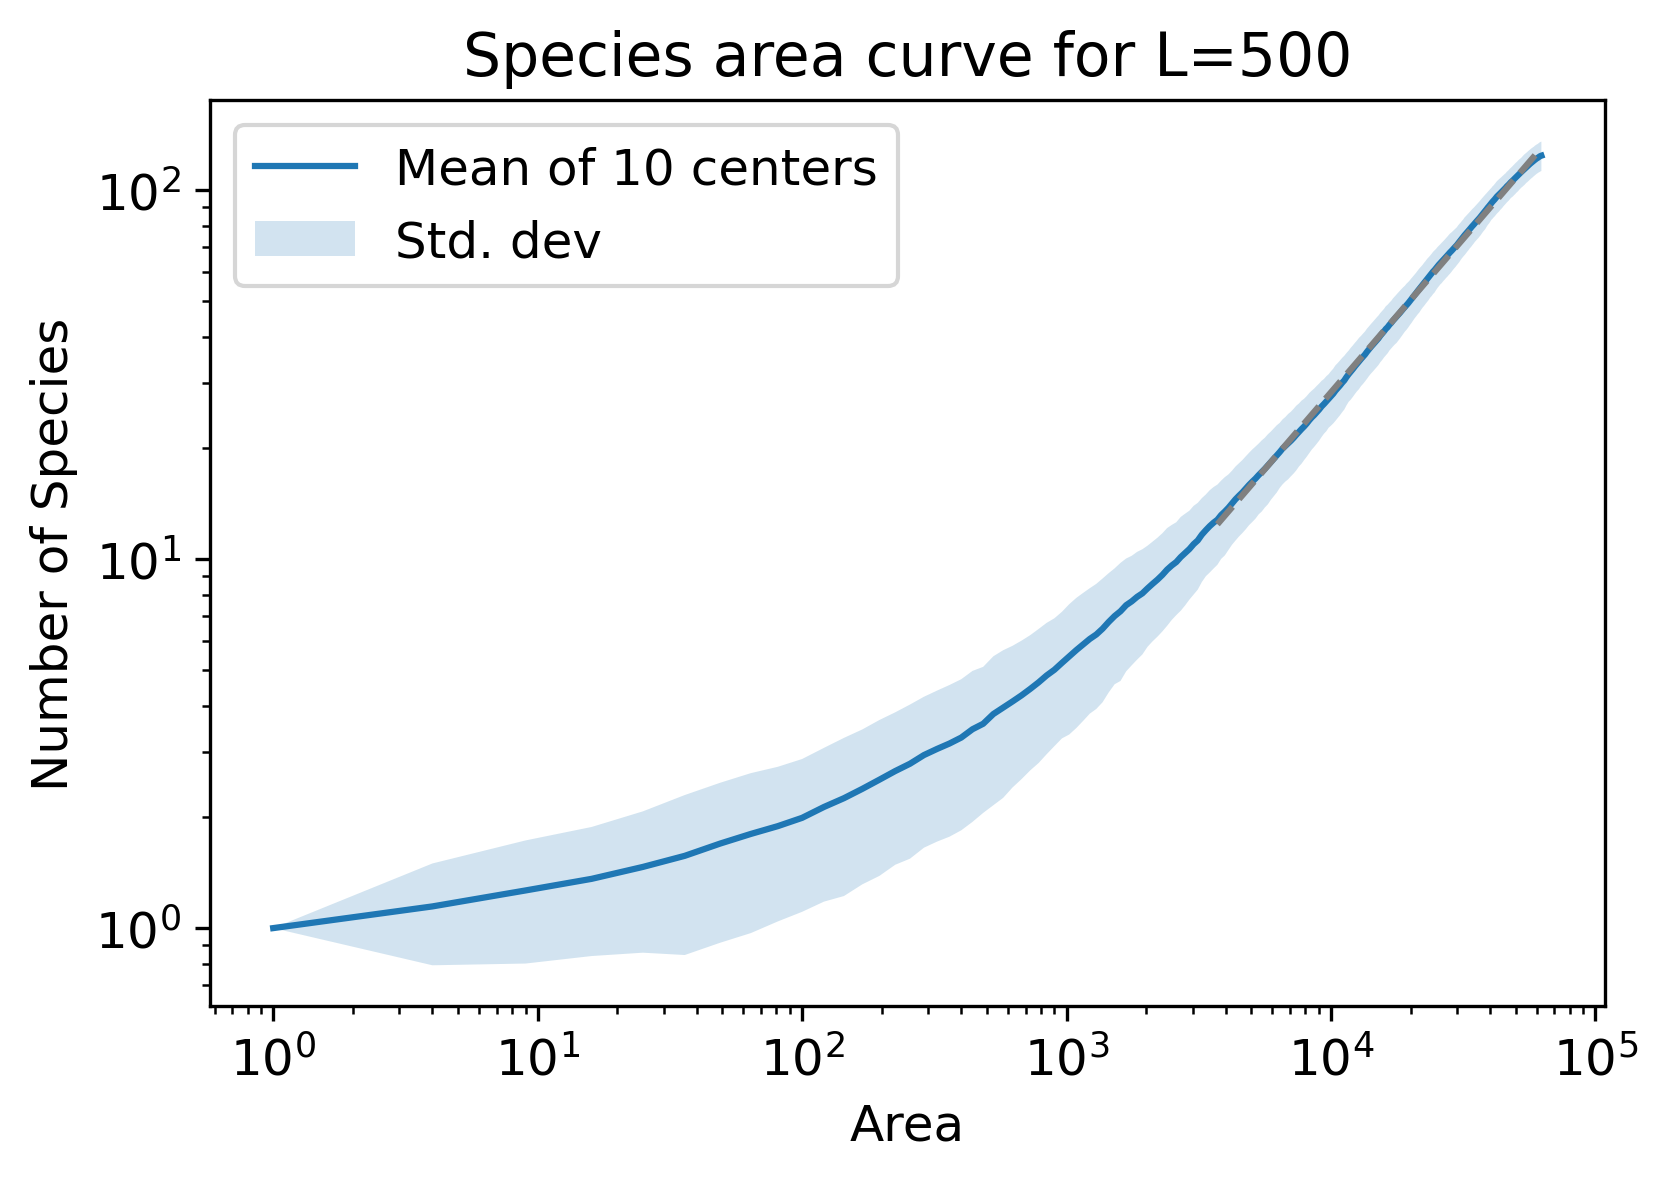

In [81]:
end_1 = 11
start_2 = 60
poly_coeffs_1 = np.polyfit(np.log(areas)[:end_1], np.log(spec_mean)[:end_1], 1)
poly_coeffs_2 = np.polyfit(np.log(areas)[start_2:], np.log(spec_mean)[start_2:], 1)

print(poly_coeffs_2[0], np.exp(poly_coeffs_2[1]))

plt.loglog(areas, spec_mean, label='Mean of 10 centers')
plt.loglog([areas[start_2], areas[-1]],
           np.exp(poly_coeffs_2[1])*np.array([areas[start_2], areas[-1]])**poly_coeffs_2[0],
           linestyle='dashed',
           color='grey')
plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label='Std. dev')
plt.ylabel('Number of Species')
plt.xlabel('Area')
plt.title(f'Species area curve for L={L}')
plt.legend()
plt.show()

In [82]:
print(np.linspace(1, np.log(max(species_sizes))))

[ 1.          1.20577653  1.41155305  1.61732958  1.82310611  2.02888264
  2.23465916  2.44043569  2.64621222  2.85198874  3.05776527  3.2635418
  3.46931833  3.67509485  3.88087138  4.08664791  4.29242443  4.49820096
  4.70397749  4.90975402  5.11553054  5.32130707  5.5270836   5.73286012
  5.93863665  6.14441318  6.35018971  6.55596623  6.76174276  6.96751929
  7.17329581  7.37907234  7.58484887  7.7906254   7.99640192  8.20217845
  8.40795498  8.6137315   8.81950803  9.02528456  9.23106109  9.43683761
  9.64261414  9.84839067 10.05416719 10.25994372 10.46572025 10.67149678
 10.8772733  11.08304983]


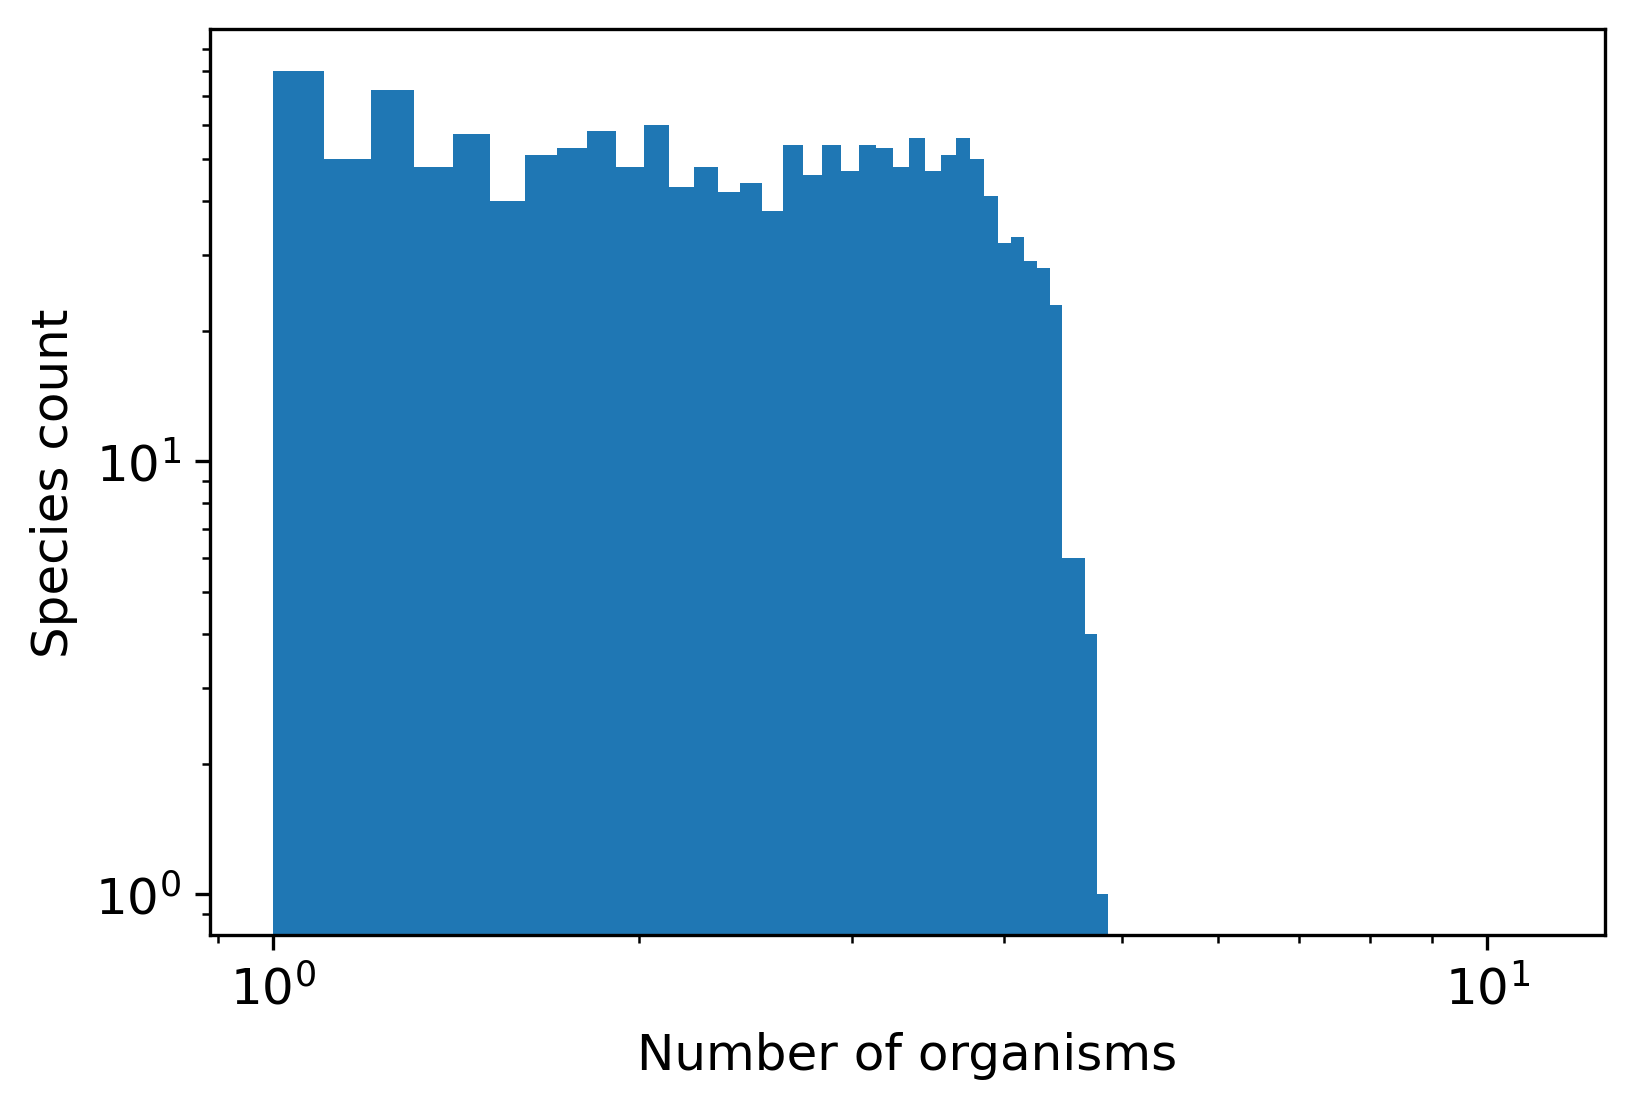

In [83]:
plt.hist(np.log10(species_sizes), bins=np.linspace(1, np.log(max(species_sizes)), 100), log=True)
plt.xlabel('Number of organisms')
plt.ylabel('Species count')
plt.xscale('log')
plt.show()

In [86]:
import scipy.stats
print(len(spec_mean[start_2:]))
fit_preds = np.exp(poly_coeffs_2[1])*np.array(areas[start_2:])**poly_coeffs_2[0]
scipy.stats.ttest_ind(spec_mean[start_2:], fit_preds, equal_var=False)

190


Ttest_indResult(statistic=-0.004548570254339396, pvalue=0.9963731781721115)